In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import warnings
import numpy as np
from sklearn.feature_selection import VarianceThreshold


In [2]:


from agents.matchmanager import buildMatchManager

import pandas as pd


vectors=[]
df=pd.DataFrame()
winners=[]
if __name__ == '__main__':
    for p in ['PlayerDummy','AlphaBetaAgent']:
        for p1 in ['PlayerDummy','AlphaBetaAgent']:
        
            mm = buildMatchManager('', 'scenarioJunction', p, p1, seed=532237451)

            while not mm.end:
                mm.nextStep()
                vectors.append(mm.state.vector())
            old=df.shape[0]
            df=pd.DataFrame(vectors)
            new=df.shape[0]
            for i in range(new-old):
                winners.append(mm.winner)
              
            
          


In [3]:
df['win']=winners

In [4]:
c=df.select_dtypes(include='object').columns

In [5]:
from sklearn import preprocessing


In [6]:
for i in c.array:
    value=df[i].unique()
    le = preprocessing.LabelEncoder()
    le.fit(value)
    df[i]=le.transform(df[i])
    

    

In [7]:
def random_forest(df):
   
    X = df.drop('win',1)
    y = df['win'].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    clf = RandomForestClassifier(n_estimators=100)

    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    proba = clf.predict_proba(X_test)
    proba = np.around(proba, decimals=2)


    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

    # feature importanti per determinarlo
    feature_imp = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
    print('Feature importance', feature_imp)

    # Creating a bar plot
    sns.barplot(x=feature_imp, y=feature_imp.index)
    # Add labels to your graph
    plt.xlabel('Feature Importance Score')
    plt.ylabel('Features')
    plt.title("Visualizing Important Features")
    plt.legend()
    plt.show()
    return X_test, y_test, y_pred, proba


In [8]:
def low_variance(df):
    X = df
    sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
    return sel.fit_transform(X)

# Random Forest

[[58  0]
 [ 0 14]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       1.00      1.00      1.00        14

   micro avg       1.00      1.00      1.00        72
   macro avg       1.00      1.00      1.00        72
weighted avg       1.00      1.00      1.00        72

Accuracy: 1.0
Feature importance 107    0.087587
28     0.087585
26     0.071381
106    0.056405
27     0.047791
67     0.042490
108    0.036507
88     0.033556
168    0.029845
8      0.029000
48     0.024225
128    0.019451
147    0.019392
76     0.017958
66     0.017832
68     0.017503
17     0.017421
90     0.016877
54     0.016044
57     0.015860
208    0.015609
130    0.014794
148    0.014161
10     0.012830
210    0.011882
56     0.010883
166    0.010170
196    0.010082
51     0.010013
217    0.009557
         ...   
104    0.000000
103    0.000000
102    0.000000
101    0.000000
100    0.000000
124    0.000000
126    0.000000
158    0.0000

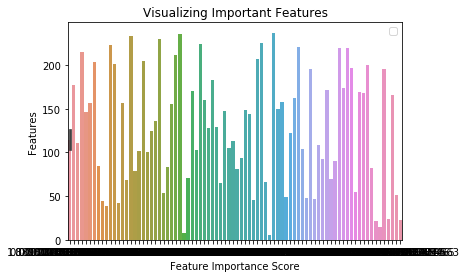

(     0    1    2    3    4    5    6    7    8    9    ...  230  231  232  \
 117    0    0    0    2    7    1    1    1    6    1  ...   18    0    0   
 173    0    0    0    2    7    1    1    1    4    3  ...   18    0    0   
 170    0    0    0    2    7    1    1    1    4    3  ...   18    0    0   
 104    0    0    0    2    7    1    1    1    6    0  ...   18    0    0   
 230    0    0    0    2    7    1    1    1    6    1  ...   18    0    0   
 221    0    0    0    2    7    1    1    1    6    0  ...   18    0    0   
 94     0    0    0    2    7    1    1    1    6    0  ...   18    0    0   
 97     0    0    0    2    7    1    1    1    6    0  ...   18    0    0   
 150    0    0    0    2    7    1    1    1    4    2  ...   18    0    0   
 207    0    0    0    2    7    1    1    1    6    1  ...   18    0    0   
 49     0    0    0    2    7    1    1    1    4    2  ...   18    0    0   
 103    0    0    0    2    7    1    1    1    6    0  ...   18

In [9]:
random_forest(df)

# Remove low variance


In [10]:
var=low_variance(df)